In [1]:
### Import the required packages
import scipy as sp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import seaborn as sns
import math
import pandas as pd

In [3]:
### Set theme
#plt.style.use('seaborn')
sns.set_style("darkgrid")

### Define the colour scheme
c1 = "#173f5f"
c2 = "#20639b"
c3 = "#3caea3"
c4 = "#f6d55c"
c5 = "#ed553b"

print("Imported the required packages successfully!")

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


Imported the required packages successfully!


Sample Correlation: 2.6%
Sample Expected Value: (-0.04,0.03)
Sample Variance: 1.01


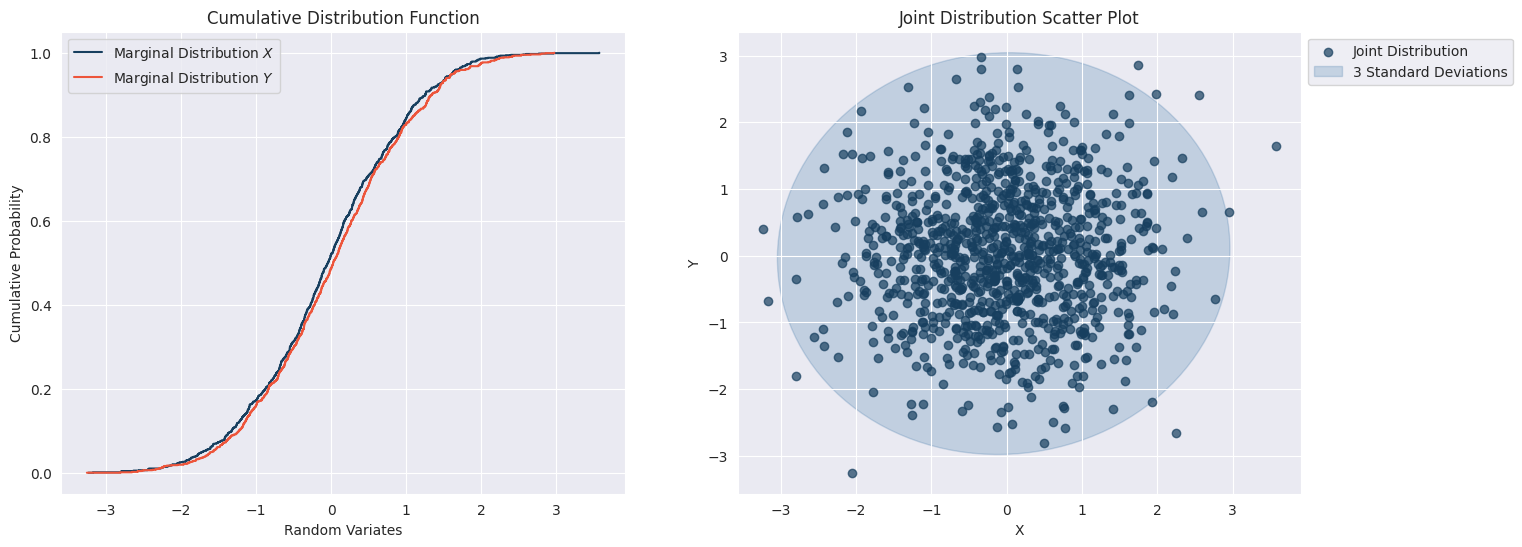

In [5]:
n = 1000

X = sp.stats.norm.rvs(loc=0, scale=1, size=n, random_state=123)
Y = sp.stats.norm.rvs(loc=0, scale=1, size=n, random_state=321)

### Emperical CDF
cdf_y = np.arange(1, n+1) / n
X_cdf_x = np.sort(X)
Y_cdf_x = np.sort(Y)

### Correlation
correlation_sample = np.corrcoef(X, Y)
print("Sample Correlation: {:.1%}".format(correlation_sample[1,0]))

### Expected Value
X_mean = np.mean(X)
Y_mean = np.mean(Y)

X2 = np.square(X)
Y2 = np.square(Y)

### Variance
var = (np.mean(X2)*np.mean(Y2)) - ((np.mean(X)**2)*(np.mean(Y)**2))

print("Sample Expected Value: ({:,.2f},{:,.2f})".format(X_mean, Y_mean))
print("Sample Variance: {:,.2f}".format(var))

### Plot the sampled PDF and CDF against the theoretical distribution
fig, ax = plt.subplots(figsize=(16,6), nrows=1, ncols=2)

ax[0].step(X_cdf_x, cdf_y, where='post', color=c1, label=r"Marginal Distribution $X$")
ax[0].step(Y_cdf_x, cdf_y, where='post', color=c5, label=r"Marginal Distribution $Y$")
ax[0].set(title="Cumulative Distribution Function", xlabel="Random Variates", ylabel="Cumulative Probability")
ax[0].legend()

ax[1].scatter(X, Y, color=c1, alpha=0.7, label="Joint Distribution")
confidence_ellipse(X, Y, ax=ax[1],alpha=0.2, facecolor=c2, edgecolor=c2, zorder=0, label="3 Standard Deviations",)
ax[1].set(title="Joint Distribution Scatter Plot", xlabel="X", ylabel="Y")
ax[1].legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()



In [15]:
correlation = 0.8
x1 = 2

mu_X = 0
std_X = 1

mu_Y = 0
std_Y = 1

# theoritical distribution
x1_pdf_x = np.linspace(-4,4,100)
x1_pdf_y = sp.stats.norm.pdf(x=x1_pdf_x, loc=0, scale=1)

# emperical distribution

x1_pdf = sp.stats.norm.pdf(x=x1, loc=0, scale=1)

E_y1 = mu_Y + (correlation*std_Y *((x1-mu_X)/std_X))
std_y1 = std_Y * math.sqrt(1 - correlation**2)



### Theoretical y1 PDF
y1_pdf_x = np.linspace(-4, 4, 100)
y1_pdf_y = sp.stats.norm.pdf(x=y1_pdf_x, loc=E_y1, scale=std_y1)


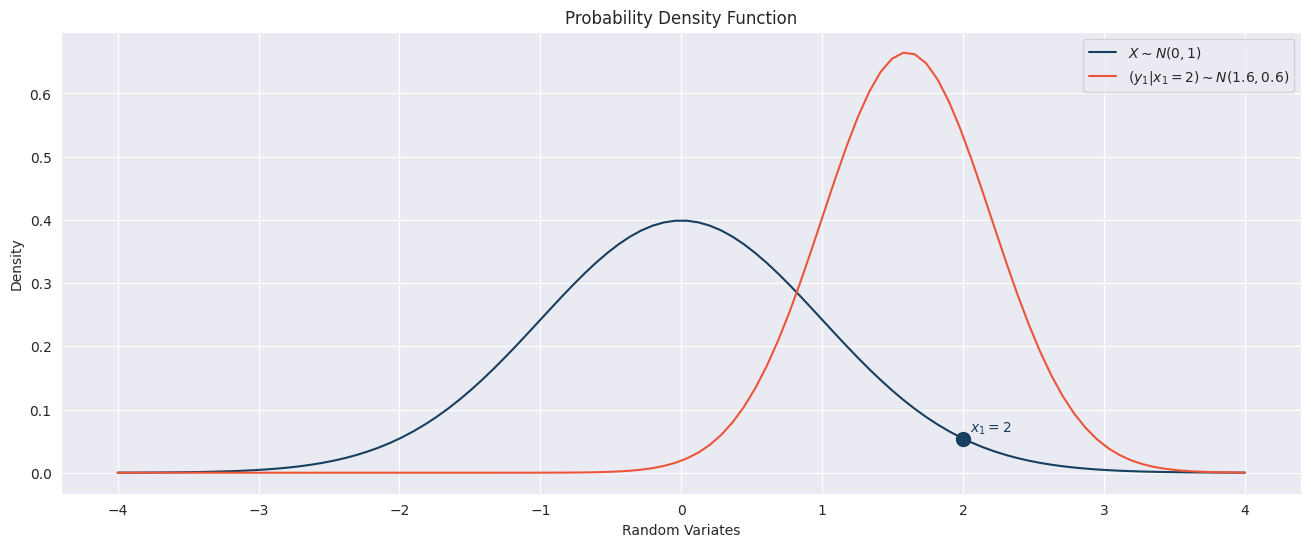

In [17]:
### Plot the sampled PDF and CDF against the theoretical distribution
fig, ax = plt.subplots(figsize=(16,6))

ax.scatter(x1, x1_pdf, color=c1, s=100, label="_nolabel_")
ax.plot(x1_pdf_x, x1_pdf_y, color=c1, label=r"$X\sim N(0,1)$")
ax.plot(y1_pdf_x, y1_pdf_y, color=c5, label=r"$(y_1|x_1={}) \sim N({:,.1f},{:,.1f})$".format(x1,E_y1,std_y1))
ax.annotate(r'$x_1={}$'.format(x1), xy=(x1+0.05, x1_pdf+0.01), color=c1)

ax.set(title="Probability Density Function", xlabel="Random Variates", ylabel="Density")
ax.legend()
plt.show()

In [ ]:
n = 1000

Z_x = sp.stats.norm.rvs(loc=0, scale=1, size=n, random_state=123)
Z_y = sp.stats.norm.rvs(loc=0, scale=1, size=n, random_state=321)

### Emperical CDF
cdf_y = np.arange(1, n+1) / n
X_cdf_x = np.sort(Z_x)
Y_cdf_x = np.sort(Z_y)

### Correlation
correlation_sample = np.corrcoef(X, Y)

### Expected Value
X_mean = np.mean(Z_x)
Y_mean = np.mean(Z_y)

X2 = np.square(Z_x)
Y2 = np.square(Z_y)

### Variance
var = (np.mean(X2)*np.mean(Y2)) - ((np.mean(X)**2)*(np.mean(Y)**2))

print("Sample Expected Value: ({:,.2f},{:,.2f})".format(X_mean, Y_mean))
print("Sample Variance: {:,.2f}".format(var))

Sample Expected Value: (-0.04,0.03)
Sample Variance: 1.01


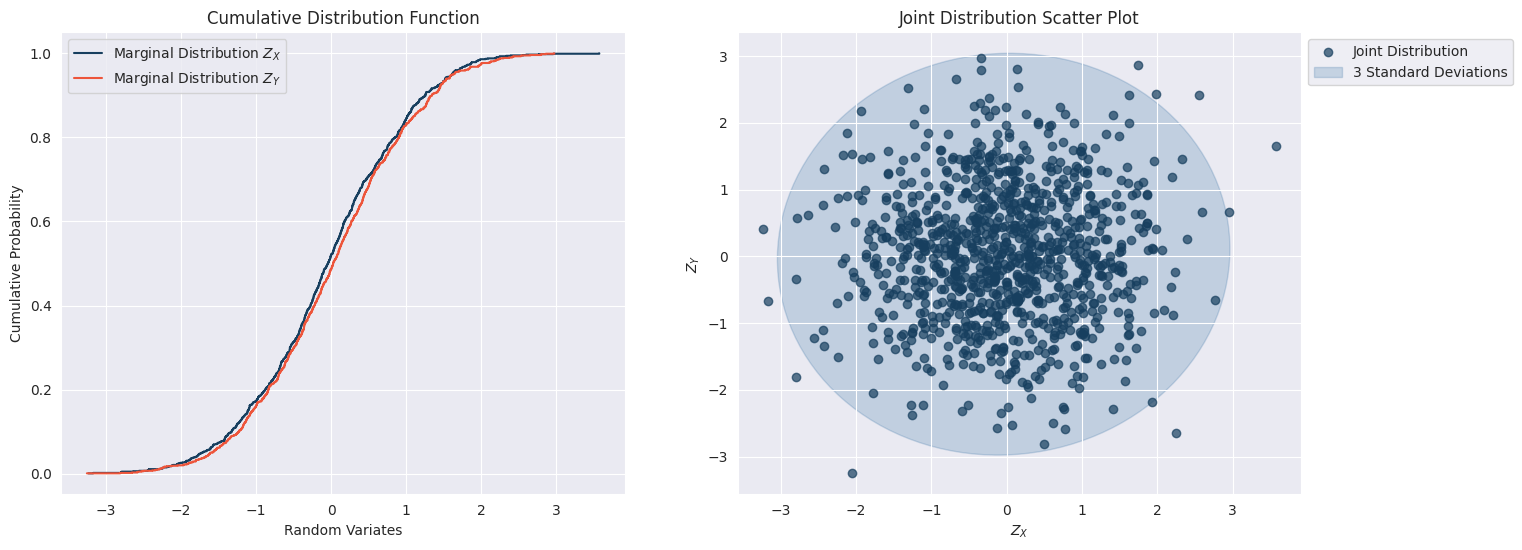

In [19]:
### Plot the sampled PDF and CDF against the theoretical distribution
fig, ax = plt.subplots(figsize=(16,6), nrows=1, ncols=2)

ax[0].step(X_cdf_x, cdf_y, where='post', color=c1, label=r"Marginal Distribution $Z_X$")
ax[0].step(Y_cdf_x, cdf_y, where='post', color=c5, label=r"Marginal Distribution $Z_Y$")
ax[0].set(title="Cumulative Distribution Function", xlabel="Random Variates", ylabel="Cumulative Probability")
ax[0].legend()

ax[1].scatter(Z_x, Z_y, color=c1, alpha=0.7, label="Joint Distribution")
confidence_ellipse(Z_x, Z_y, ax=ax[1],alpha=0.2, facecolor=c2, edgecolor=c2, zorder=0, label="3 Standard Deviations",)
ax[1].set(title="Joint Distribution Scatter Plot", xlabel=r"$Z_X$", ylabel=r"$Z_Y$")
ax[1].legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

Sample Expected Value: (-0.04,-0.01)
Sample Variance: 1.03


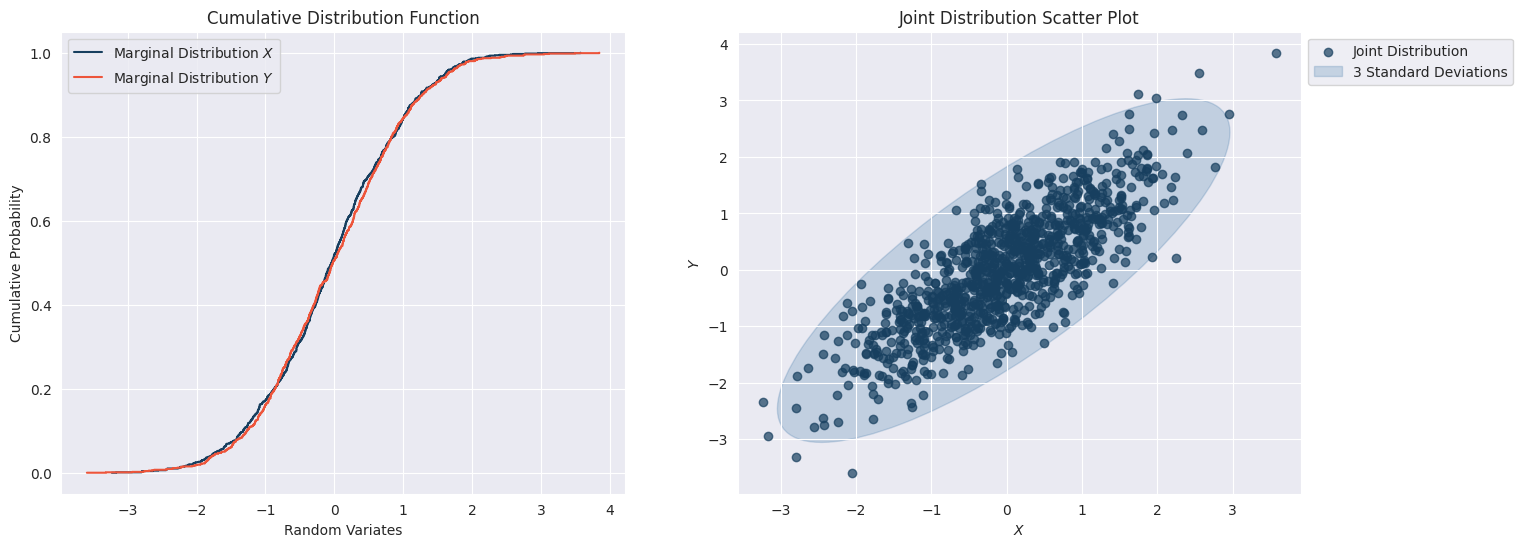

In [20]:


correlation = 0.8
n = 1000

Z_x = sp.stats.norm.rvs(loc=0, scale=1, size=n, random_state=123)
Z_y = sp.stats.norm.rvs(loc=0, scale=1, size=n, random_state=321)

# Construct the correlation matrix and Cholesky Decomposition
rho = np.matrix([[1, correlation], [correlation, 1]])
cholesky = np.linalg.cholesky(rho)

Z = np.matrix([Z_x, Z_y])

Z_XY = cholesky * Z

X = np.array(Z_XY[0,:]).flatten()
Y = np.array(Z_XY[1,:]).flatten()

### Emperical CDF
cdf_y = np.arange(1, n+1) / n
X_cdf_x = np.sort(X)
Y_cdf_x = np.sort(Y)

### Correlation
correlation_sample = np.corrcoef(X, Y)

### Expected Value
X_mean = np.mean(X)
Y_mean = np.mean(Y)

X2 = np.square(X)
Y2 = np.square(Y)

### Variance
var = (np.mean(X2)*np.mean(Y2)) - ((np.mean(X)**2)*(np.mean(Y)**2))

print("Sample Expected Value: ({:,.2f},{:,.2f})".format(X_mean, Y_mean))
print("Sample Variance: {:,.2f}".format(var))

### Plot the sampled PDF and CDF against the theoretical distribution
fig, ax = plt.subplots(figsize=(16,6), nrows=1, ncols=2)

ax[0].step(X_cdf_x, cdf_y, where='post', color=c1, label=r"Marginal Distribution $X$")
ax[0].step(Y_cdf_x, cdf_y, where='post', color=c5, label=r"Marginal Distribution $Y$")
ax[0].set(title="Cumulative Distribution Function", xlabel="Random Variates", ylabel="Cumulative Probability")
ax[0].legend()

ax[1].scatter(X, Y, color=c1, alpha=0.7, label="Joint Distribution")
confidence_ellipse(X, Y, ax=ax[1],alpha=0.2, facecolor=c2, edgecolor=c2, zorder=0, label="3 Standard Deviations",)
ax[1].set(title="Joint Distribution Scatter Plot", xlabel=r"$X$", ylabel=r"$Y$")
ax[1].legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

